In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
# import pymc3 as pm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])

## Helper Functions

In [2]:
def compute_grid_approximation(prior, success=6, tosses=9):
    """
        This function helps calculate a grid approximation of the posterior distribution.
        
        Parameters:
            prior: np.array
                A distribution representing our state of knowledge before seeing the data.
                Number of items should be the same as number of grid points.
                
            success: integer
                Number of successes.
            
            tosses: integer
                Number of tosses (i.e. successes + failures).
                
        Returns: 
            p_grid: np.array
                Evenly-spaced out grid between 0 and 1.
                
            posterior: np.array
                The posterior distribution.
    """
    # define grid
    p_grid = np.linspace(0, 1, prior.shape[0])

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior, success, tosses

In [3]:
def plot_grid_approximation(p_grid, posterior, success, tosses, x_label):
    """
        This function plots a grid approximation of the posterior distribution.
    """
    plt.plot(p_grid, posterior, 'o-', label=f'Success = {success}\nTosses = {tosses}')
    plt.xlabel(x_label)
    plt.ylabel('Posterior Probability')
    plt.legend(loc=0)

## 2M1

In [ ]:
# We'll create distributions with 20 points
prior = np.ones(20)
print(prior)
x_label = 'Probability of Water'
# 1
pg, po, s, t = compute_grid_approximation(prior, success=3, tosses=3)
plot_grid_approximation(pg, po, s, t, x_label)
# 2
pg, po, s, t = compute_grid_approximation(prior, 3, 4)
plot_grid_approximation(pg, po, s, t, x_label)
# 3
pg, po, s, t = compute_grid_approximation(prior, 5, 7)
plot_grid_approximation(pg, po, s, t, x_label)

## 2M2

In [ ]:
# Create distributions with 20 points
p_grid = np.linspace(start=0, stop=1, num=20)
prior = np.where(p_grid < 0.5, 0, 1)
x_label = 'Probability of Water'
# 1) W, W, W
pg, po, s, t = compute_grid_approximation(prior, success=3, 3)
plot_grid_approximation(pg, po, s, t, x_label)
# 2) W, W, W, L
pg, po, s, t = compute_grid_approximation(prior, 3, 4)
plot_grid_approximation(pg, po, s, t, x_label)
# 3) L, W, W, L, W, W, W
pg, po, s, t = compute_grid_approximation(prior, 5, 7)
plot_grid_approximation(pg, po, s, t, x_label)

## 2M3

$$P(S=a \mid C_1=2) = \frac{P(C_1=2 \mid S=a)P(S=a)}{P(C_1=2)} = \frac{0.05}{0.05+0.1} = \frac{1}{3}$$
$$P(S=b \mid C_1=2) = 1 - P(S=a \mid C_1=2)=\frac{2}{3}$$
$$P(C_2=2 \mid C_1=2) = \sum_S P(C_2=2, S, \mid C_1=2)\\
= P(C_2=2, S=a \mid C_1=2) + P(C_2=2, S=b \mid C_1=2)\\
= P(C_2=2 \mid S=a, C_1=2) \cdot P(S=a \mid C_1=2 \quad+ P(C_2=2 \mid S=b, C_1=2) \cdot P(S=b \mid C_1=2)\\
= P(C_2=2 \mid S=a) \cdot P(S=a \mid C_1=2) \quad+ P(C_2=2 \mid S=b) \cdot P(S=b \mid C_1=2) \text{Conditional independence. See Note below}\\
= \frac{1}{10} \times \frac{1}{3} + \frac{2}{10} \times \frac{2}{3}\\
= \frac{1}{30} + \frac{4}{30}\\
= \frac{1}{6}$$

## 2M4

In [ ]:
from __future__ import absolute_import
from __future__ import unicode_literals
from __future__ import print_function
from __future__ import division

__author__ = """Aric Hagberg (hagberg@lanl.gov)"""

from pygraphviz import *

A=AGraph()

# set some default node attributes
A.node_attr['style']='filled'
A.node_attr['shape']='circle'
A.node_attr['fixedsize']='true'
A.node_attr['fontcolor']='#FFFFFF'

# make a star in shades of red
for i in range(16):
    A.add_edge(0,i)
    n=A.get_node(i)
    n.attr['fillcolor']="#%2x0000"%(i*16)
    n.attr['height']="%s"%(i/16.0+0.5)
    n.attr['width']="%s"%(i/16.0+0.5)

print(A.string()) # print to screen
A.write("star.dot") # write to simple.dot
print("Wrote star.dot")
A.draw('star.png',prog="circo") # draw to png using circo
print("Wrote star.png")

In [ ]:
A=pgv.AGraph()

A.add_edge(1,2)
A.add_edge(2,3)
A.add_edge(1,3)

print(A.string()) # print to screen
print("Wrote simple.dot")
A.write('simple.dot') # write to simple.dot

B=pgv.AGraph('simple.dot') # create a new graph from file
B.layout() # layout with default (neato)
B.draw('simple.png') # draw png
print("Wrote simple.png")

## 2M5

In [ ]:
a = stats.binom.pmf(2, n=2, p=0.1)
b = stats.binom.pmf(2, n=2, p=0.2)
a*0.5+b*0.5

## 2M6

In [ ]:
stats.binom.rvs(size=10, n=2, p=0.7)

## 2M7

In [ ]:
dummy_w = stats.binom.rvs(size=100000, n=9, p=0.6)
# [(dummy_w == i).mean() for i in range(3)]
plt.hist(dummy_w, bins=50)

## 2H1

In [ ]:
pg, po, w, n = grid_approximation(np.ones(20), 6, 9)
samples = np.random.choice(pg, p=po, size=10000, replace=True)

## 2H2

In [ ]:
dummy_w = stats.binom.rvs(size=10000, n=n, p=samples)
# [(dummy_w == i).mean() for i in range(3)]
plt.hist(dummy_w, bins=50)

## 2H3

(array([ 1.,  1.,  1.,  0.,  2.,  2.,  1.,  2.,  6.,  6.,  4.,  3.,  8.,
        14., 13., 19., 15., 13., 19., 26., 25., 27., 28., 32., 45., 33.,
        33., 35., 42., 45., 41., 45., 33., 45., 52., 50., 22., 30., 35.,
        26., 26., 21., 17., 11., 15., 14.,  6.,  5.,  3.,  2.]),
 array([0.1951952 , 0.21029029, 0.22538539, 0.24048048, 0.25557558,
        0.27067067, 0.28576577, 0.30086086, 0.31595596, 0.33105105,
        0.34614615, 0.36124124, 0.37633634, 0.39143143, 0.40652653,
        0.42162162, 0.43671672, 0.45181181, 0.46690691, 0.482002  ,
        0.4970971 , 0.51219219, 0.52728729, 0.54238238, 0.55747748,
        0.57257257, 0.58766767, 0.60276276, 0.61785786, 0.63295295,
        0.64804805, 0.66314314, 0.67823824, 0.69333333, 0.70842843,
        0.72352352, 0.73861862, 0.75371371, 0.76880881, 0.7839039 ,
        0.798999  , 0.81409409, 0.82918919, 0.84428428, 0.85937938,
        0.87447447, 0.88956957, 0.90466466, 0.91975976, 0.93485485,
        0.94994995]),
 <a list of 50

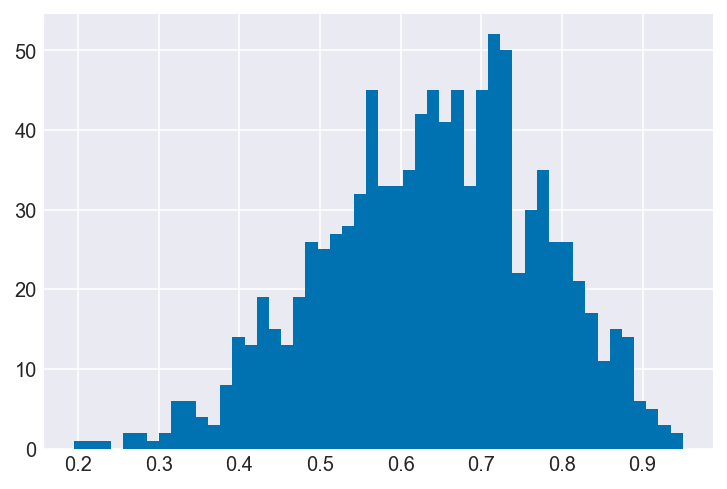

In [4]:
np.random.seed(3)
size = 1000
prior = np.ones(size)
pg, po, s, t = compute_grid_approximation(prior, success=6, tosses=9)
samples = np.random.choice(pg, p=po, size=size, replace=True)
plt.hist(samples, bins=50)

## 2H4

In [35]:
np.mean(samples < 0.2)

0.001

In [36]:
np.mean(samples > 0.8)

0.119

In [38]:
np.mean((samples > 0.2) & (samples < 0.8))

0.88

In [39]:
np.percentile(samples, 20)

0.5223223223223223

In [9]:
np.percentile(samples, 100-20)

0.7577577577577577

In [ ]:
plt.plot(pg, po)
plt.xlabel('proportion of water (p)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks([0,0.25,0.50,0.75,1.00])
plt.fill_between(pg, po, where = (pg > perc_range))

In [5]:
az.hpd(samples, credible_interval=0.66)

C:\Users\philip.griffith\Miniconda3\lib\site-packages\arviz\stats\stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)


array([0.39339339, 0.88388388])

In [8]:
az.hdi(samples, hdi_prob=0.66)

array([0.51851852, 0.78178178])

In [11]:
np.percentile(samples, [17, 83])

array([0.5035035 , 0.77377377])

In [ ]:
pg, po, w, n = grid_approximation(np.ones(100), success=8, tosses=15)
plt.plot(pg, po)

In [ ]:
np.random.seed(1492)
samples2 = np.random.choice(pg, p=po, size=10000, replace=True)
az.hpd(samples2, credible_interval=.9)

In [ ]:
ppc = stats.binom.rvs(n=15, size=10000, p=samples2)
plt.hist(ppc, bins=50)
np.mean(ppc == 8)

In [ ]:
ppc2 = stats.binom.rvs(n=9, size=10000, p=samples2)
plt.hist(ppc2, bins=50)
np.mean(ppc2 == 6)

In [ ]:
prior3 = np.where(np.linspace(start=0, stop=1, num=1000) < 0.5, 0, 1)
pg3, po3, w, n = grid_approximation(prior3, success=8, tosses=15)
plt.plot(pg3, po3)

In [ ]:
samples3 = np.random.choice(pg3, p=po3, size=10000, replace=True)
az.hpd(samples3, credible_interval=.9)

In [ ]:
ppc3 = stats.binom.rvs(n=15, size=10000, p=samples3)
plt.hist(ppc3, bins=50)
np.mean(ppc3 == 8)

In [ ]:
ppc4 = stats.binom.rvs(n=9, size=10000, p=samples3)
plt.hist(ppc4, bins=50)
np.mean(ppc4 == 6)

In [ ]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

In [ ]:
total = len(birth1) + len(birth2)
boys = sum(birth1) + sum(birth2)
pg, po, b, n = grid_approximation(np.ones(1000), success=boys, tosses=total)
plt.plot(pg, po)

In [ ]:
pg[po == max(po)]

In [ ]:
samples = np.random.choice(pg, p=po, size=10000, replace=True)

In [ ]:
for i in (0.5, 0.89, 0.97):
    print(f'{i}:', az.hpd(samples, credible_interval=i))

In [ ]:
ppc = stats.binom.rvs(n=200, size=10000, p=samples)

In [ ]:
np.mean(ppc == boys)

In [ ]:
az.plot_kde(ppc)
plt.axvline(boys, color='red')

In [ ]:
boys2 = sum(birth1)
pg2, po2, b2, n2 = grid_approximation(np.ones(1000), success=boys2, tosses=len(birth1))
samples2 = np.random.choice(pg2, p=po2, size=10000, replace=True)
ppc2 = stats.binom.rvs(n=100, size=10000, p=samples2)
az.plot_kde(ppc2)
plt.axvline(boys2, color='red')

In [ ]:
ppc3 = stats.binom.rvs(n=100, size=10000, p=samples)
az.plot_kde(ppc3)
plt.axvline(boys2, color='red')

In [ ]:
first_girls = len(birth1) - sum(birth1)
boys_after_girls = birth2[birth1 == 0]
samples4 = stats.binom.rvs(n=first_girls, size=10000, p=samples)
az.plot_kde(samples4)
plt.axvline(sum(boys_after_girls), color='red')
lower, upper = az.hpd(samples4, 0.95)
plt.axvline(lower, color='black')
plt.axvline(upper, color='black')

In [ ]:
pos = np.random.uniform(-1, 1, size=(16, 10000)).sum(0)
az.plot_kde(pos)

In [ ]:
pos = np.random.uniform(1, 1.1, size=(12, 10000)).prod(0)
az.plot_kde(pos)

In [ ]:
big = np.random.uniform(1, 1.5, size=(12, 10000)).prod(0)
small = np.random.uniform(1, 1.01, size=(12, 10000)).prod(0))
_, ax = plt.subplots(1,2, figsize=(8,4))
az.plot_kde(big, ax=ax[0])
az.plot_kde(small, ax=ax[1])

In [ ]:
pos = np.log(np.random.uniform(1, 1.5, size=(12, 10000)).prod(0))
az.plot_kde(pos)

In [ ]:
sample_size = 10000
m = stats.norm.rvs(178, 20, sample_size)
s = stats.uniform.rvs(0, 50, sample_size)
prior_h = stats.norm.rvs(m, s, sample_size)
az.plot_kde(prior_h)

In [ ]:
m = stats.norm.rvs(178, 100, sample_size)
s = stats.uniform.rvs(0, 50, sample_size)
prior_h = stats.norm.rvs(m, s, sample_size)
az.plot_kde(prior_h)

In [ ]:
print(np.mean(prior_h < 0))
np.mean(prior_h > 272)